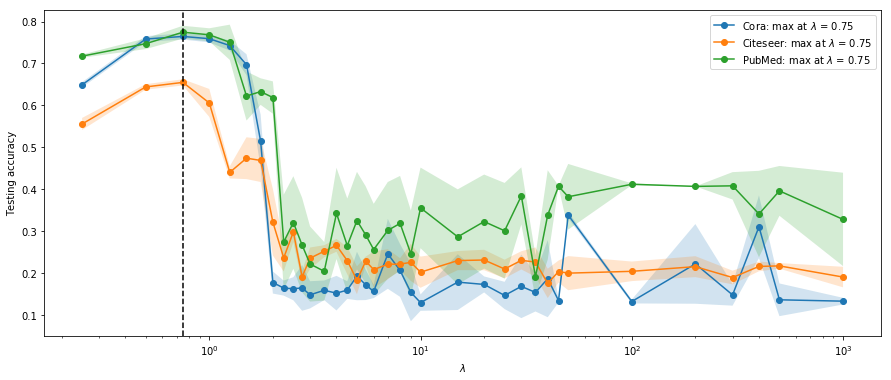

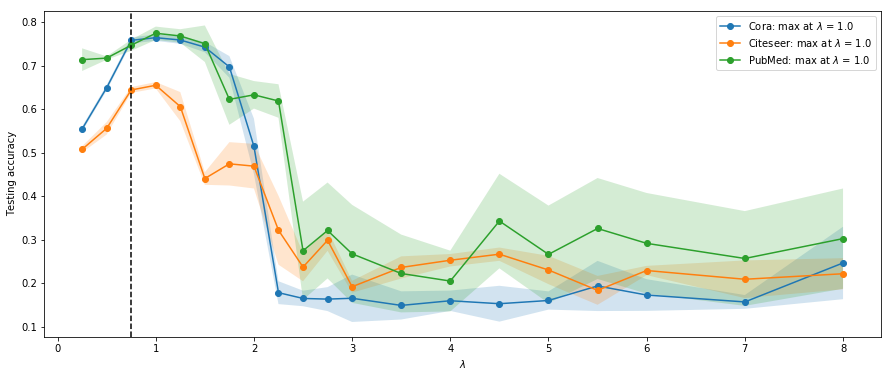

In [28]:
######################################################################
# Semi-Supervised Classification of Graph Nodes using Exponential Decay
# L42: Assessment 2
# Jan Ondras (jo356), Trinity College
######################################################################
#############################################################################################################
# Plot testing accuracies of my method on 3 different datasets
#############################################################################################################

import numpy as np
from matplotlib import pyplot as plt

lambdas = [0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5, 2.75, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 
           6.0, 7.0, 8.0, 9.0, 10.0, 15.0, 20.0, 25.0, 30.0, 35.0, 40.0, 45.0, 50.0, 
           100.0, 200.0, 300.0, 400.0, 500.0, 1000.0]

labels = ['Cora', 'Citeseer', 'PubMed']
testingResults = [ # produced by  "MM" files
    # Cora
    (
        [0.6492599964141845, 0.7583300048112869, 0.7644900023937226, 0.7591000044345856, 0.742719999551773, 0.6971600019931793, 0.514439999461174, 0.17783999979496, 0.16455999985337258, 0.16300999924540518, 0.16495000042021274, 0.14852000042796135, 0.15926000192761422, 0.1524299991130829, 0.15984000079333782, 0.1933000022172928, 0.17240000069141387, 0.15652000091969967, 0.24623000167310238, 0.2065700013935566, 0.15417999938130378, 0.12988000124692917, 0.17877999998629093, 0.17328000023961068, 0.14703000001609326, 0.1686399994790554, 0.154220000654459, 0.18701000176370144, 0.1348099987208843, 0.3386800017952919, 0.1325099990516901, 0.2222400013357401, 0.14826999723911286, 0.3107300028204918, 0.13664000123739242, 0.13336999990046025], 
        [0.006333435829664597, 0.006852815077747781, 0.007426297660286535, 0.008803977686694069, 0.011894605109274784, 0.02492497843902942, 0.06386428064777548, 0.02631262711524836, 0.017897105853068994, 0.027537789253498295, 0.054536296706487804, 0.03243747083091769, 0.0234152177660734, 0.04123984724038146, 0.020984623029340576, 0.05774694666110514, 0.036421421709910036, 0.015862206168430867, 0.0833885915928743, 0.06286036171610634, 0.06850348593560718, 0.01953524098334388, 0.06648437053746964, 0.019063620369356916, 0.03248613767742464, 0.07568943231758667, 0.04540607514882321, 0.0918786694396614, 0.004584092604811652, 0.007577441475311135, 0.004568359437149833, 0.09499601283563656, 0.025603069476197664, 0.07487066962758741, 0.03895703363453094, 0.007968256028387893]    
    ),
    # Citeseer
    (
        [0.5558600008487702, 0.6441199994087219, 0.6549699991941452, 0.6059299984574318, 0.4404400023818016, 0.47425000101327897, 0.46889999985694886, 0.3215300000458956, 0.2367099991440773, 0.2982999996840954, 0.19153000071644782, 0.23587000027298927, 0.25244999915361405, 0.26637000024318697, 0.2299600002914667, 0.18315999910235406, 0.22879999965429307, 0.2086800006777048, 0.2213799986988306, 0.22171999961137773, 0.22588999986648559, 0.20247000008821486, 0.23011999905109407, 0.23152999967336654, 0.21007000014185906, 0.23068999968469142, 0.22658999919891357, 0.17575999975204468, 0.20401999920606614, 0.2001799999177456, 0.204529999345541, 0.21567999988794326, 0.1897400002926588, 0.2162200003862381, 0.21747000023722649, 0.19086999982595443], 
        [0.01432760892214896, 0.0066185782293885845, 0.007384381808736592, 0.033374020174716475, 0.014487457188884945, 0.04984182599888458, 0.05137324214202001, 0.07935659470264748, 0.03260591698183285, 0.024181191050162528, 0.013654637019411248, 0.025485546466980844, 0.014310398230466433, 0.015270662312966643, 0.03254133300388936, 0.033217380706210387, 0.010705138337054334, 0.04336355166003854, 0.03583762854987894, 0.014133704299782711, 0.04445129854800063, 0.037158163431927564, 0.022802315401203286, 0.02440428475769273, 0.02220732021051682, 0.021705619171743865, 0.03492279858819937, 0.034921660378892716, 0.026162562099077347, 0.04066334452223994, 0.023340717578576996, 0.024941082676925092, 0.01631908041761595, 0.0115529910137204, 0.0066969475611151985, 0.02448250602435723]
    ),
    # PubMed
    (
        [0.7174999994039536, 0.7471500039100647, 0.774640000462532, 0.7683999979496002, 0.7505900034308434, 0.6224899998307228, 0.6330000001192093, 0.6187900030612945, 0.2742100030183792, 0.320920005440712, 0.2671200014650822, 0.22194000363349914, 0.20457000583410262, 0.34262999311089515, 0.2659700006246567, 0.3254799953103065, 0.2912999993562698, 0.25649000465869903, 0.302199998497963, 0.31871999859809874, 0.24613000571727753, 0.35575000286102293, 0.2866900062561035, 0.32313999891281125, 0.3011500036716461, 0.3843000054359436, 0.1916500061750412, 0.33890999913215636, 0.40730000436306, 0.38228999137878417, 0.4120999902486801, 0.40700000524520874, 0.40833998799324034, 0.34117000579833984, 0.396329990029335, 0.32833999693393706],
        [0.00386135053416318, 0.012783096339805046, 0.01532156635450226, 0.015524818354550494, 0.04197668352289177, 0.05846494641923644, 0.031639533234629, 0.03854070344463223, 0.11302992859181273, 0.11032829781271254, 0.11271692729313616, 0.08951566932832222, 0.06990797222540596, 0.10879996346792398, 0.11218594912608768, 0.11612393735633647, 0.11585606632560781, 0.10900206023769364, 0.11531989462207289, 0.11328442077837202, 0.10348059057853742, 0.0960774012064291, 0.1132955148463313, 0.112084427661421, 0.11410279019483521, 0.06809999942779542, 0.05078116843135463, 0.10654304631759128, 0.0013076658378649798, 0.07821115606342283, 0.0021424222287607458, 0.0, 0.0326199972629547, 0.10300398497972649, 0.059367503994063105, 0.1112717514590238]
    )
]

N_std = 1
showN = 36 # max 36
plt.figure(figsize=[15,6])
for i, (test_acc, test_acc_std) in enumerate(testingResults):
    test_acc = np.array(test_acc)
    test_acc_std = np.array(test_acc_std)
    plt.plot(lambdas[:showN], test_acc[:showN],'o-', label=labels[i]+': max at $\lambda$ = '+str(lambdas[np.argmax(test_acc)]))
    plt.fill_between(lambdas[:showN],  test_acc[:showN]-N_std*test_acc_std[:showN],  test_acc[:showN]+N_std*test_acc_std[:showN], alpha=.2)
plt.xlabel('$\lambda$')
plt.ylabel('Testing accuracy')
#plt.xticks(lambdas[:showN], lambdas[:showN])#, rotation=45)
plt.xscale('log')
plt.legend()
plt.axvline(0.75, linestyle='--', color='black')
plt.show()

lambda0 = [
    0.554350004196, 
    0.507599999309,
    0.713900001347
]
lambda0_std = [
    0.00574173480228,
    0.00710351817853,
    0.0260911876802
]

N_std = 1
showN = 20 # max 36
plt.figure(figsize=[15,6])
for i, (test_acc, test_acc_std) in enumerate(testingResults):
    test_acc = np.array([lambda0[i]] + test_acc)
    test_acc_std = np.array([lambda0_std[i]] + test_acc_std)
    plt.plot(lambdas[:showN], test_acc[:showN],'o-', label=labels[i]+': max at $\lambda$ = '+str(lambdas[np.argmax(test_acc)]))
    plt.fill_between(lambdas[:showN],  test_acc[:showN]-N_std*test_acc_std[:showN],  test_acc[:showN]+N_std*test_acc_std[:showN], alpha=.2)
plt.xlabel('$\lambda$')
plt.ylabel('Testing accuracy')
#plt.xticks(lambdas[:showN], lambdas[:showN])#, rotation=45)
# plt.xscale('log')
plt.legend()
plt.axvline(0.75, linestyle='--', color='black')
plt.show()

In [1]:
# Calculate upper bounds on new features' magnitudes

import numpy as np

N = [2708, 3327, 19717]
lam = 0.75
for n in N:
    print 1. + (n-1.)*np.exp(-1./lam)



714.557452879
877.724081373
5198.08117509
